In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import re


import warnings
warnings.filterwarnings('ignore')

In [2]:
from selenium import webdriver

In [3]:
driver = webdriver.Chrome()

In [5]:
url = "https://www.makemytrip.com/hotels/hotel-listing/?_uCurrency=INR&checkin=10082024&checkout=10092024&city=CTGOI&country=IN&filterData=MERGE_PROPERTY_TYPE%7CHotel&locusId=CTGOI&locusType=city&regionNearByExp=3&roomStayQualifier=2e0e&rsc=1e2e0e&searchText=Goa"

In [6]:
driver.get(url)

In [10]:
print(driver.get(url))

None


In [7]:
# # Get scroll height
# import time
# last_height = driver.execute_script("return document.body.scrollHeight")

# while True:
#     # Scroll down to bottom
#     driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

#     # Wait to load page
#     time.sleep(5)

#     # Calculate new scroll height and compare with last scroll height
#     new_height = driver.execute_script("return document.body.scrollHeight")
#     if new_height == last_height:
#         break
#     last_height = new_height

In [8]:

# Get initial scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

for _ in range(400):
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(4)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height


<html lang="eng" dir="ltr" style="--font-scale: 1;"><head>
        <meta charset="utf-8">
          
          <meta name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=5">
          <meta name="theme-color" content="#FFF">
          <link rel="dns-prefetch" href="//fonts.googleapis.com">
          <link rel="dns-prefetch" href="//fonts.gstatic.com">
          <link rel="dns-prefetch" href="//imgak.mmtcdn.com">
          <link rel="dns-prefetch" href="//jsak.mmtcdn.com">
          <link rel="preconnect" href="//imgak.mmtcdn.com">
          <link rel="preconnect" href="//jsak.mmtcdn.com">
          <link rel="stylesheet" as="style" onload="this.rel = 'stylesheet'" href="https://fonts.googleapis.com/css?family=Lato:300,400,400i,700,900&amp;display=swap&amp;text=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890"><link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Lato:300,400,400i,700,900&amp;display=swap&amp;text=abcd
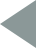
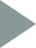

In [13]:
html = driver.page_source
print(html)

<html dir="ltr" lang="eng" style="--font-scale: 1;"><head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=5" name="viewport"/>
<meta content="#FFF" name="theme-color"/>
<link href="//fonts.googleapis.com" rel="dns-prefetch"/>
<link href="//fonts.gstatic.com" rel="dns-prefetch"/>
<link href="//imgak.mmtcdn.com" rel="dns-prefetch"/>
<link href="//jsak.mmtcdn.com" rel="dns-prefetch"/>
<link href="//imgak.mmtcdn.com" rel="preconnect"/>
<link href="//jsak.mmtcdn.com" rel="preconnect"/>
<link as="style" href="https://fonts.googleapis.com/css?family=Lato:300,400,400i,700,900&amp;display=swap&amp;text=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890" onload="this.rel = 'stylesheet'" rel="stylesheet"/><link href="https://fonts.googleapis.com/css?family=Lato:300,400,400i,700,900&amp;display=swap&amp;text=abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ1234567890" media="all" onload="this.media='all'" rel="stylesheet"/>
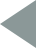
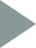

In [14]:
soup = BeautifulSoup(html)
print(soup)

In [15]:
Names = []

for i in soup.find_all('div', class_='flexOne appendLeft20'):
    if re.findall("^[A-Za-z0-9 &',\-.a]+",i.text):
        Names.append(re.findall("^[A-Za-z0-9 &',\-.a]+",i.text)[0])
    else:
        Names.append(np.nan)

<!-- Hotel = []
Location = []
Ratings = []
walk = []


for i in soup.find_all('div', class_='flexOne appendLeft20'):
    r = i.find('span', class_='wordBreak appendRight10')
    Hotel.append(r.text)
    
    r1 = i.find('span', class_='blueText')
    Location.append(r1.text)
    
    r2 = i.find('span', class_="ratingValue")
    Ratings.append(r2)
    
    near = i.find('span', class_="latoRegular")
    walk.append(near)
    
    
    
    
    """
    s = i.find('div', class_='pc__html')
    #print(s.text)
    print(re.findall("(\w+)\s\|",s.text))""" -->

In [16]:
Hotel = []

for i in soup.find_all('div', class_='flexOne appendLeft20'):
    r = i.find('span', class_='wordBreak appendRight10')
    Hotel.append(r.text)

In [17]:
buildingtype_1df = pd.DataFrame({ "Hotel":Hotel }) 

In [18]:
buildingtype_1df

,Hotel
0,Hotel Rajdhani
1,"Ginger Goa, Panjim"
2,Goa Woodlands Hotel
3,Hotel Campal
4,I Love Bell Bottoms Vagator Goa
5,SinQ The Party Hotel (No Stags Allowed)
6,TreeHouse Neptune
7,Novotel Goa Panjim
8,"Taj Fort Aguada Resort & Spa, Goa"
9,"Ginger Goa, Dona Paula"


In [19]:
buildingtype_1df['Building_Type'] = 'Apartment'

In [20]:
buildingtype_1df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Hotel          10 non-null     object
 1   Building_Type  10 non-null     object
dtypes: object(2)
memory usage: 288.0+ bytes


In [21]:
buildingtype_1df.nunique()

Hotel            10
Building_Type     1
dtype: int64

In [22]:
buildingtype_1df.Building_Type.value_counts()

Building_Type
Apartment    10
Name: count, dtype: int64

In [23]:
buildingtype_1df

,Hotel,Building_Type
0,Hotel Rajdhani,Apartment
1,"Ginger Goa, Panjim",Apartment
2,Goa Woodlands Hotel,Apartment
3,Hotel Campal,Apartment
4,I Love Bell Bottoms Vagator Goa,Apartment
5,SinQ The Party Hotel (No Stags Allowed),Apartment
6,TreeHouse Neptune,Apartment
7,Novotel Goa Panjim,Apartment
8,"Taj Fort Aguada Resort & Spa, Goa",Apartment
9,"Ginger Goa, Dona Paula",Apartment


## saving df to excel

In [24]:
buildingtype_1df.to_excel(r"C:\Users\DELL\Final Project/files/buildingtype_1df.xlsx")

OSError: Cannot save file into a non-existent directory: 'C:\Users\DELL\Final Project\files'

## reading saved excel df

In [335]:
buildingtype_1df = pd.read_excel(r'C:\Users\DELL\Final Project/files/buildingtype_1df.xlsx')

In [337]:
buildingtype_1df.drop(columns = 'Unnamed: 0', inplace = True)
buildingtype_1df

,Hotel,Building_Type
0,Hotel Rajdhani,Apartment
1,TreeHouse Neptune,Apartment
2,"Ginger Goa, Panjim",Apartment
3,"Taj Holiday Village Resort & Spa, Goa",Apartment
4,I Love Bell Bottoms Vagator Goa,Apartment
...,...,...
325,"FabHotel Royal Mirage With Pool & GYM, Candoli...",Apartment
326,SinQ Anvaya,Apartment
327,Cochichos Resort,Apartment
328,"Destino Hotel, Goa",Apartment


## scraping hotel type 2

In [219]:
driver = webdriver.Chrome()

In [220]:
url = "https://www.makemytrip.com/hotels/hotel-listing/?_uCurrency=INR&checkin=10112024&checkout=10132024&city=CTGOI&country=IN&filterData=MERGE_PROPERTY_TYPE%7CVilla&locusId=CTGOI&locusType=city&regionNearByExp=3&roomStayQualifier=2e0e&rsc=1e2eundefinede&searchText=Goa"


In [221]:
driver.get(url)


In [222]:
# Get initial scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

for _ in range(400):
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(6)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height


In [223]:
html = driver.page_source

In [224]:
soup = BeautifulSoup(html)

In [225]:
Names = []

for i in soup.find_all('div', class_='flexOne appendLeft20'):
    if re.findall("^[A-Za-z0-9 &',\-.a]+",i.text):
        Names.append(re.findall("^[A-Za-z0-9 &',\-.a]+",i.text)[0])
    else:
        Names.append(np.nan)

In [226]:
Hotel = []

for i in soup.find_all('div', class_='flexOne appendLeft20'):
    r = i.find('span', class_='wordBreak appendRight10')
    Hotel.append(r.text)

In [227]:
buildingtype_2df = pd.DataFrame({ "Hotel":Hotel }) 

In [228]:
buildingtype_2df

,Hotel
0,"ama Stays & Trails | La Maison Fontainhas, Goa"
1,Neemrana's Three Waters
2,Emperor Ozran by Alaya Stays
3,SaffronStays Magnolias by River Moira
4,Crown Villa Vagator| Rooms Near the Beach
...,...
441,Villa Teca Floresta Vistas
442,Veena Villa by Basil Stays
443,Mar Selva by Koala 4 BR mansion in Siolim V2
444,La Sierra Estate Villa (3BHK) at Vagator by Tr...


In [229]:
buildingtype_2df['Building_Type'] = 'Villa'

In [230]:
buildingtype_2df.nunique()

Hotel            446
Building_Type      1
dtype: int64

In [231]:
buildingtype_2df.Building_Type.value_counts()

Building_Type
Villa    446
Name: count, dtype: int64

In [232]:
buildingtype_2df

,Hotel,Building_Type
0,"ama Stays & Trails | La Maison Fontainhas, Goa",Villa
1,Neemrana's Three Waters,Villa
2,Emperor Ozran by Alaya Stays,Villa
3,SaffronStays Magnolias by River Moira,Villa
4,Crown Villa Vagator| Rooms Near the Beach,Villa
...,...,...
441,Villa Teca Floresta Vistas,Villa
442,Veena Villa by Basil Stays,Villa
443,Mar Selva by Koala 4 BR mansion in Siolim V2,Villa
444,La Sierra Estate Villa (3BHK) at Vagator by Tr...,Villa


In [258]:
buildingtype_2df.to_excel(r"C:\Users\DELL\Final Project/files/buildingtype_2df.xlsx")

In [260]:
buildingtype_2df = pd.read_excel(r'C:\Users\DELL\Final Project/files/buildingtype_2df.xlsx')

In [261]:
buildingtype_2df.drop(columns = 'Unnamed: 0', inplace = True)

In [330]:
buildingtype_2df

,Hotel,Building_Type
0,"ama Stays & Trails | La Maison Fontainhas, Goa",Villa
1,Neemrana's Three Waters,Villa
2,Emperor Ozran by Alaya Stays,Villa
3,SaffronStays Magnolias by River Moira,Villa
4,Crown Villa Vagator| Rooms Near the Beach,Villa
...,...,...
441,Villa Teca Floresta Vistas,Villa
442,Veena Villa by Basil Stays,Villa
443,Mar Selva by Koala 4 BR mansion in Siolim V2,Villa
444,La Sierra Estate Villa (3BHK) at Vagator by Tr...,Villa


## scraping hotel type 3

In [431]:
driver = webdriver.Chrome()


In [432]:
url = "https://www.makemytrip.com/hotels/hotel-listing/?_uCurrency=INR&checkin=10112024&checkout=10132024&city=CTGOI&country=IN&filterData=MERGE_PROPERTY_TYPE%7CResort&locusId=CTGOI&locusType=city&regionNearByExp=3&roomStayQualifier=2e0e&rsc=1e2eundefinede&searchText=Goa"


In [433]:
driver.get(url)


In [434]:


# Get initial scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

for _ in range(400):
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(7)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height


In [435]:
html = driver.page_source


In [436]:
soup = BeautifulSoup(html)


In [437]:
Names = []

for i in soup.find_all('div', class_='flexOne appendLeft20'):
    if re.findall("^[A-Za-z0-9 &',\-.a]+",i.text):
        Names.append(re.findall("^[A-Za-z0-9 &',\-.a]+",i.text)[0])
    else:
        Names.append(np.nan)


In [438]:

Hotel = []

for i in soup.find_all('div', class_='flexOne appendLeft20'):
    r = i.find('span', class_='wordBreak appendRight10')
    Hotel.append(r.text)


In [439]:
buildingtype_3df = pd.DataFrame({ "Hotel":Hotel }) 


In [440]:
buildingtype_3df


,Hotel
0,Hyatt Ronil Goa - a JdV by Hyatt
1,Kay's Riverview Resort
2,Nazri Resort & Lawns Baga
3,The Park Calangute
4,The Park Baga River Goa (Adults only Property)
...,...
307,Raja Resort
308,Sur La Mer
309,Indy suites Candolim
310,Kranti's Beach Resort


In [441]:
buildingtype_3df['Building_Type'] = 'Resort'


In [442]:
buildingtype_3df.nunique()


Hotel            312
Building_Type      1
dtype: int64

In [443]:
buildingtype_3df.Building_Type.value_counts()


Building_Type
Resort    312
Name: count, dtype: int64

In [444]:
buildingtype_3df


,Hotel,Building_Type
0,Hyatt Ronil Goa - a JdV by Hyatt,Resort
1,Kay's Riverview Resort,Resort
2,Nazri Resort & Lawns Baga,Resort
3,The Park Calangute,Resort
4,The Park Baga River Goa (Adults only Property),Resort
...,...,...
307,Raja Resort,Resort
308,Sur La Mer,Resort
309,Indy suites Candolim,Resort
310,Kranti's Beach Resort,Resort


In [550]:
buildingtype_3df.to_excel(r"C:\Users\DELL\Final Project/files/buildingtype_3df.xlsx")

In [552]:
buildingtype_3df = pd.read_excel(r'C:\Users\DELL\Final Project/files/buildingtype_3df.xlsx')

In [554]:
buildingtype_3df.drop(columns = 'Unnamed: 0', inplace = True)

In [556]:
buildingtype_3df

,Hotel,Building_Type
0,Hyatt Ronil Goa - a JdV by Hyatt,Resort
1,Kay's Riverview Resort,Resort
2,Nazri Resort & Lawns Baga,Resort
3,The Park Calangute,Resort
4,The Park Baga River Goa (Adults only Property),Resort
...,...,...
307,Raja Resort,Resort
308,Sur La Mer,Resort
309,Indy suites Candolim,Resort
310,Kranti's Beach Resort,Resort


## scraping hotel type 4

In [509]:
driver = webdriver.Chrome()

In [510]:
url = r'https://www.makemytrip.com/hotels/hotel-listing/?_uCurrency=INR&checkin=10112024&checkout=10132024&city=CTGOI&country=IN&filterData=MERGE_PROPERTY_TYPE%7CHotel&locusId=CTGOI&locusType=city&regionNearByExp=3&roomStayQualifier=2e0e&rsc=1e2eundefinede&searchText=Goa'


In [511]:
driver.get(url)

In [512]:

# Get initial scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

for _ in range(400):
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(7)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height


In [513]:
html = driver.page_source

In [514]:
soup = BeautifulSoup(html)

In [515]:
Names = []

for i in soup.find_all('div', class_='flexOne appendLeft20'):
    if re.findall("^[A-Za-z0-9 &',\-.a]+",i.text):
        Names.append(re.findall("^[A-Za-z0-9 &',\-.a]+",i.text)[0])
    else:
        Names.append(np.nan)

In [516]:
Hotel = []

for i in soup.find_all('div', class_='flexOne appendLeft20'):
    r = i.find('span', class_='wordBreak appendRight10')
    Hotel.append(r.text)

In [517]:
buildingtype_4df = pd.DataFrame({ "Hotel":Hotel }) 

In [518]:
buildingtype_4df

,Hotel
0,TreeHouse Neptune
1,"Ginger Goa, Panjim"
2,Hotel Rajdhani
3,Hotel Campal
4,ibis Styles Goa Calangute - An Accor Brand
...,...
614,Hotel O Om Babu Guest House
615,Hotel O Home Hotel Sea Prince Suites
616,Hotel Mobor Beach Resort
617,Palm Heaven


In [519]:
buildingtype_4df['Building_Type'] = 'Hotel'

In [520]:
buildingtype_4df.nunique()

Hotel            619
Building_Type      1
dtype: int64

In [521]:
buildingtype_4df.Building_Type.value_counts()

Building_Type
Hotel    619
Name: count, dtype: int64

In [522]:
buildingtype_4df

,Hotel,Building_Type
0,TreeHouse Neptune,Hotel
1,"Ginger Goa, Panjim",Hotel
2,Hotel Rajdhani,Hotel
3,Hotel Campal,Hotel
4,ibis Styles Goa Calangute - An Accor Brand,Hotel
...,...,...
614,Hotel O Om Babu Guest House,Hotel
615,Hotel O Home Hotel Sea Prince Suites,Hotel
616,Hotel Mobor Beach Resort,Hotel
617,Palm Heaven,Hotel


In [558]:
buildingtype_4df.to_excel(r"C:\Users\DELL\Final Project/files/buildingtype_4df.xlsx")

In [560]:
buildingtype_4df = pd.read_excel(r'C:\Users\DELL\Final Project/files/buildingtype_4df.xlsx')

In [562]:
buildingtype_4df.drop(columns = 'Unnamed: 0', inplace = True)

In [564]:
buildingtype_4df

,Hotel,Building_Type
0,TreeHouse Neptune,Hotel
1,"Ginger Goa, Panjim",Hotel
2,Hotel Rajdhani,Hotel
3,Hotel Campal,Hotel
4,ibis Styles Goa Calangute - An Accor Brand,Hotel
...,...,...
614,Hotel O Om Babu Guest House,Hotel
615,Hotel O Home Hotel Sea Prince Suites,Hotel
616,Hotel Mobor Beach Resort,Hotel
617,Palm Heaven,Hotel


## scraping hotel type 5

In [52]:
driver = webdriver.Chrome()


In [53]:
url = r'https://www.makemytrip.com/hotels/hotel-listing/?checkin=10142024&checkout=10162024&locusId=CTGOI&locusType=city&city=CTGOI&country=IN&searchText=Goa&roomStayQualifier=2e0e&_uCurrency=INR&reference=hotel&filterData=MERGE_PROPERTY_TYPE%7CHomestay&type=city&rsc=1e2e0e'


In [54]:
driver.get(url)


In [55]:

# Get initial scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

for _ in range(40):
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(6)

    # # Calculate new scroll height and compare with last scroll height
    # new_height = driver.execute_script("return document.body.scrollHeight")
    # if new_height == last_height:
    #     break
    # last_height = new_height


In [56]:
html = driver.page_source


In [57]:
soup = BeautifulSoup(html)


In [58]:
Names = []

for i in soup.find_all('div', class_='flexOne appendLeft20'):
    if re.findall("^[A-Za-z0-9 &',\-.a]+",i.text):
        Names.append(re.findall("^[A-Za-z0-9 &',\-.a]+",i.text)[0])
    else:
        Names.append(np.nan)

In [59]:
Hotel = []

for i in soup.find_all('div', class_='flexOne appendLeft20'):
    r = i.find('span', class_='wordBreak appendRight10')
    Hotel.append(r.text)


In [66]:
buildingtype_5df = pd.DataFrame({ "Hotel": Hotel }) 


In [68]:
buildingtype_5df


,Hotel
0,Sabinas Homestay
1,Casa Ruth Guest House | Rooms & Caretaker
2,Lar Amorosa Boutique B&B Portuguese Stay in Goa
3,Costa De Calangute Inn | Rooms & Cafe
4,Naik Guest House 2
...,...
196,Janardan Home Stay
197,G.S Stay
198,Mira residency
199,Bliss rooms


In [70]:
buildingtype_5df['Building_Type'] = 'Homestay'

In [72]:
buildingtype_5df.nunique()


Hotel            201
Building_Type      1
dtype: int64

In [74]:
buildingtype_5df.Building_Type.value_counts()


Building_Type
Homestay    201
Name: count, dtype: int64

In [76]:
buildingtype_5df


,Hotel,Building_Type
0,Sabinas Homestay,Homestay
1,Casa Ruth Guest House | Rooms & Caretaker,Homestay
2,Lar Amorosa Boutique B&B Portuguese Stay in Goa,Homestay
3,Costa De Calangute Inn | Rooms & Cafe,Homestay
4,Naik Guest House 2,Homestay
...,...,...
196,Janardan Home Stay,Homestay
197,G.S Stay,Homestay
198,Mira residency,Homestay
199,Bliss rooms,Homestay


## saving df to excel

In [79]:
buildingtype_5df.to_excel(r"C:\Users\DELL\Final Project/files/buildingtype_5df.xlsx")


## reading saved excel df

In [143]:
buildingtype_5df = pd.read_excel(r'C:\Users\DELL\Final Project/files/buildingtype_5df.xlsx')


In [145]:
buildingtype_5df.drop(columns = 'Unnamed: 0', inplace = True)


In [147]:
buildingtype_5df

,Hotel,Building_Type
0,Sabinas Homestay,Homestay
1,Casa Ruth Guest House | Rooms & Caretaker,Homestay
2,Lar Amorosa Boutique B&B Portuguese Stay in Goa,Homestay
3,Costa De Calangute Inn | Rooms & Cafe,Homestay
4,Naik Guest House 2,Homestay
...,...,...
196,Janardan Home Stay,Homestay
197,G.S Stay,Homestay
198,Mira residency,Homestay
199,Bliss rooms,Homestay


## scraping hotel type 6

In [102]:
driver = webdriver.Chrome()


In [103]:
url = r'https://www.makemytrip.com/hotels/hotel-listing/?_uCurrency=INR&checkin=10142024&checkout=10162024&city=CTGOI&country=IN&filterData=MERGE_PROPERTY_TYPE%7CGuest%20House&locusId=CTGOI&locusType=city&reference=hotel&roomStayQualifier=2e0e&rsc=1e2e0e&searchText=Goa&type=city'

In [104]:
driver.get(url)


In [105]:

# Get initial scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

for _ in range(40):
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(6)

    # Calculate new scroll height and compare with last scroll height
    # new_height = driver.execute_script("return document.body.scrollHeight")
    # if new_height == last_height:
    #     break
    # last_height = new_height


In [106]:
html = driver.page_source


In [107]:
soup = BeautifulSoup(html)


In [108]:
Names = []

for i in soup.find_all('div', class_='flexOne appendLeft20'):
    if re.findall("^[A-Za-z0-9 &',\-.a]+",i.text):
        Names.append(re.findall("^[A-Za-z0-9 &',\-.a]+",i.text)[0])
    else:
        Names.append(np.nan)

In [109]:
Hotel = []

for i in soup.find_all('div', class_='flexOne appendLeft20'):
    r = i.find('span', class_='wordBreak appendRight10')
    Hotel.append(r.text)


In [110]:
buildingtype_6df = pd.DataFrame({ "Hotel":Hotel }) 


In [111]:
buildingtype_6df


,Hotel
0,Casa Almeida Guest House
1,Casa Bri Bon
2,Sai Guru Guest House
3,Veronica Resort by the sea
4,Bello Guest House
...,...
90,Baga Tropical
91,Naisha Guest House
92,Jassida Home Stay
93,Frankies holiday inn


In [112]:
buildingtype_6df['Building_Type'] = 'Guest House'


In [113]:
buildingtype_6df.nunique()


Hotel            95
Building_Type     1
dtype: int64

In [116]:
buildingtype_6df.Building_Type.value_counts()


Building_Type
Guest House    95
Name: count, dtype: int64

In [117]:
buildingtype_6df


,Hotel,Building_Type
0,Casa Almeida Guest House,Guest House
1,Casa Bri Bon,Guest House
2,Sai Guru Guest House,Guest House
3,Veronica Resort by the sea,Guest House
4,Bello Guest House,Guest House
...,...,...
90,Baga Tropical,Guest House
91,Naisha Guest House,Guest House
92,Jassida Home Stay,Guest House
93,Frankies holiday inn,Guest House


## saving df to excel

In [131]:
buildingtype_6df.to_excel(r"C:\Users\DELL\Final Project/files/buildingtype_6df.xlsx")

## reading df from excel 

In [152]:
buildingtype_6df = pd.read_excel(r'C:\Users\DELL\Final Project/files/buildingtype_6df.xlsx')


In [154]:
buildingtype_6df.drop(columns = 'Unnamed: 0', inplace = True)


In [141]:
buildingtype_6df


,Hotel,Building_Type
0,Casa Almeida Guest House,Guest House
1,Casa Bri Bon,Guest House
2,Sai Guru Guest House,Guest House
3,Veronica Resort by the sea,Guest House
4,Bello Guest House,Guest House
...,...,...
90,Baga Tropical,Guest House
91,Naisha Guest House,Guest House
92,Jassida Home Stay,Guest House
93,Frankies holiday inn,Guest House
